In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?

2.) Did the poll results favor Romney or Obama?

3.) How do undecided voters effect the poll?

4.) Can we account for the undecided voters?

5.) How did voter sentiment change over time?

6.) Can we see an effect in the polls from the debates?


In [1]:
#Libraries

#Data
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Download the data
from io import StringIO
import requests

#For division
from __future__ import division

In [2]:
#Downloading the data and loading them in Python
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source = requests.get(url).text

poll_data = StringIO(source)

In [3]:
#Data to DataFrame

poll_df = pd.read_csv(poll_data)

In [4]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [5]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


1.) Who was being polled and what was their party affiliation?

In [6]:
poll_df.drop(columns=["Question Text","Question Iteration","Other"],inplace=True)

In [7]:
#Swithching the Other to None
poll_df['Affiliation'].loc[poll_df['Affiliation'] == 'Other'] = 'None'

/home/alex/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


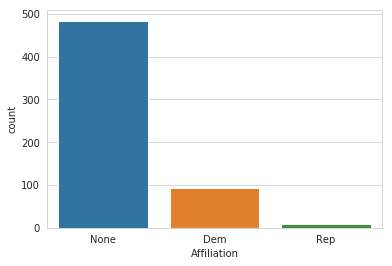

In [8]:
#First look at the affiliation
poll_df['Affiliation'].value_counts() / len(poll_df) * 100

sns.countplot('Affiliation',data = poll_df,order = ['None','Dem','Rep'])

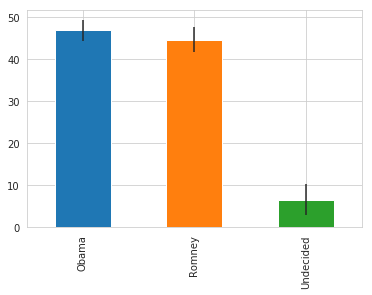

In [9]:
#First, the mean
avg = poll_df[['Obama','Romney','Undecided','Number of Observations']].mean()
avg.drop("Number of Observations",axis=0,inplace=True)

#Second, the error
std = poll_df[['Obama','Romney','Undecided','Number of Observations']].std()
std.drop("Number of Observations",axis=0, inplace=True)

#Let's plot everything
avg.plot(yerr = std,kind = "bar", legend = False)

In [10]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['avg','std']

In [11]:
poll_avg

,avg,std
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


It seems super tight!

In [54]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference for Obama,Start_date
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00,2012-11-04
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,0.02,2012-11-03
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00,2012-11-03
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,0.01,2012-11-03
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01,2012-11-03


In [53]:
poll_df['End Date'] = pd.to_datetime(poll_df['End Date'],yearfirst=True).sort_values(ascending= True)
poll_df['Start Date'] = pd.to_datetime(poll_df['Start Date'],yearfirst=True)

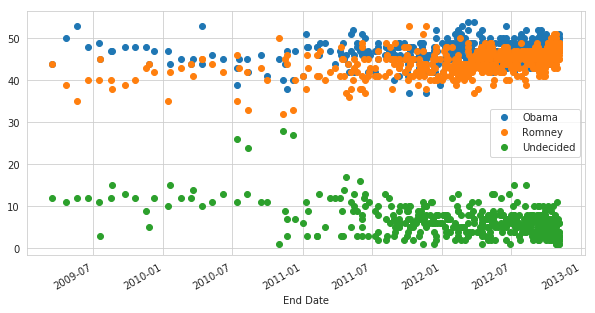

In [14]:
poll_df.plot(x="End Date",y=['Obama','Romney','Undecided'],marker = "o", linestyle = " ", figsize=(10,5),legend=True)

In [15]:
from datetime import datetime

In [16]:
poll_df['Difference for Obama'] = (poll_df['Obama'] - poll_df['Romney']) / 100

In [19]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference for Obama
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [20]:
poll_df_groupby = poll_df.groupby("Start Date").mean()

In [21]:
poll_df_groupby.reset_index(drop=False,inplace=True)

In [22]:
poll_df_groupby['Start Date'] = pd.to_datetime(poll_df_groupby['Start Date'])

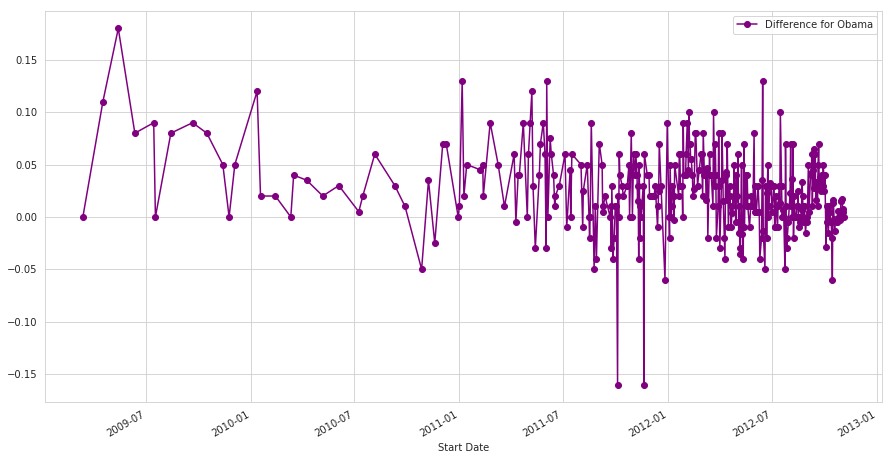

In [23]:
fig = poll_df_groupby.plot("Start Date","Difference for Obama",color = "purple",marker = "o", figsize = (15,8),linestyle = "-")

In [49]:
poll_df['Start_date'] = poll_df['Start Date'].astype('str').sort_values(ascending=False)

In [47]:
len(poll_df['Start Date'])

586

0     2012-11-04
1     2012-11-03
2     2012-11-03
3     2012-11-03
4     2012-11-03
5     2012-11-03
6     2012-11-03
7     2012-11-01
8     2012-11-02
9     2012-11-02
10    2012-11-02
11    2012-11-01
12    2012-11-01
13    2012-11-01
14    2012-11-01
15    2012-11-01
16    2012-11-01
17    2012-11-01
18    2012-10-31
19    2012-10-31
20    2012-11-02
21    2012-10-31
22    2012-10-31
23    2012-10-30
24    2012-10-30
25    2012-10-29
26    2012-10-26
27    2012-10-29
28    2012-10-28
29    2012-10-27
         ...    
556   2010-10-27
557   2010-09-28
558   2010-09-10
559   2010-08-06
560   2010-08-06
561   2010-07-16
562   2010-07-09
563   2010-07-09
564   2010-06-04
565   2010-05-07
566   2010-04-09
567   2010-04-09
568   2010-03-17
569   2010-03-12
570   2010-02-13
571   2010-01-18
572   2010-01-12
573   2009-12-04
574   2009-11-24
575   2009-11-13
576   2009-10-16
577   2009-09-21
578   2009-08-14
579   2009-08-14
580   2009-07-18
581   2009-07-15
582   2009-06-12
583   2009-05-

In [48]:
# Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for dates in poll_df['Start_date']:
    print(dates)
    if dates[0:7] == "2012-10":
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print (min(xlimit))
print (max(xlimit))

2012-11-04
2012-11-03
2012-11-03
2012-11-03
2012-11-03
2012-11-03
2012-11-03
2012-11-01
2012-11-02
2012-11-02
2012-11-02
2012-11-01
2012-11-01
2012-11-01
2012-11-01
2012-11-01
2012-11-01
2012-11-01
2012-10-31
2012-10-31
2012-11-02
2012-10-31
2012-10-31
2012-10-30
2012-10-30
2012-10-29
2012-10-26
2012-10-29
2012-10-28
2012-10-27
2012-10-28
2012-10-28
2012-10-22
2012-10-27
2012-10-26
2012-10-26
2012-10-25
2012-10-25
2012-10-25
2012-10-25
2012-10-24
2012-10-22
2012-10-25
2012-10-24
2012-10-22
2012-10-22
2012-10-23
2012-10-23
2012-10-22
2012-10-19
2012-10-22
2012-10-20
2012-10-19
2012-10-20
2012-10-20
2012-10-19
2012-10-18
2012-10-18
2012-10-18
2012-10-18
2012-10-16
2012-10-15
2012-10-18
2012-10-17
2012-10-17
2012-10-16
2012-10-17
2012-10-18
2012-10-16
2012-10-14
2012-10-11
2012-10-11
2012-10-13
2012-10-13
2012-10-11
2012-10-10
2012-10-12
2012-10-11
2012-10-08
2012-10-12
2012-10-10
2012-10-10
2012-10-07
2012-10-08
2012-10-06
2012-10-04
2012-10-07
2012-10-07
2012-10-04
2012-10-06
2012-10-05

ValueError: too many values to unpack (expected 2)

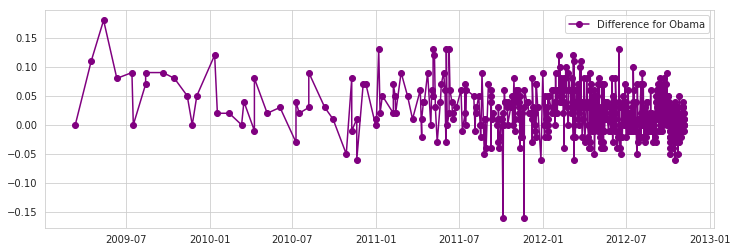

In [41]:
# Start with original figure
fig = poll_df.plot('Start Date','Difference for Obama',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=("2012-10"))

# Now add the debate markers
#plt.axvline(x=18+2, linewidth=4, color='grey')
#plt.axvline(x=18+10, linewidth=4, color='grey')
#plt.axvline(x=18+21, linewidth=4, color='grey')